In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential, load_model
import mysql.connector
from keras.optimizers import Adam
from sklearn import preprocessing
import datetime
cnx = mysql.connector.connect(user='root', password='941012',
                              host='127.0.0.1',
                              database='test0')
cursor = cnx.cursor()
query = ("SELECT n1,n2,P1,T1,P2,T2 FROM test0.2016stablepoint LIMIT 1,25000")
cursor.execute(query)
result=cursor.fetchall()
x_list = np.array(result)
scaler = preprocessing.StandardScaler().fit(x_list)
train_x = scaler.transform(x_list)
#print train_x
query = ("SELECT T34 FROM test0.2016stablepoint LIMIT 1,25000")
cursor.execute(query)
result=cursor.fetchall()
y_list = np.array(result)
#print y_list
#print np.hstack((train_x,y_list))
x_list = np.hstack((train_x,y_list))
row1 = int(round(0.8 * x_list.shape[0]))
row2 = int(round(0.9 * x_list.shape[0]))
train = x_list[:row1, :]
test = x_list[row2:, :]
np.random.seed(10)
np.random.shuffle(train)
X_train = train[:,0:6]
y_train = train[:,-1]
np.random.seed(10)
np.random.shuffle(test)
X_test = test[:,0:6]
y_test = test[:,-1]
y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
cursor.close()
cnx.close()
#print X_train
#print y_train
model = Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['mae', 'mape'])

Using TensorFlow backend.


In [2]:
starttime = datetime.datetime.now()
model.fit(
    X_train, y_train,
    batch_size=50, epochs=170,validation_split=0.15, verbose=0)
endtime = datetime.datetime.now()
print 'TIME: '+str((endtime - starttime).seconds)

TIME: 75


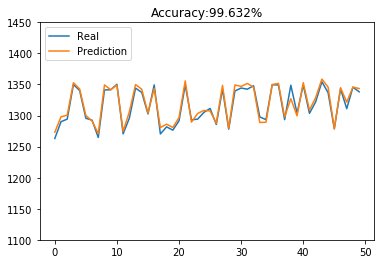

In [4]:
predicted = model.predict(X_test)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
a = np.load('/home/wuhang/LSTM_code/testout.npy')
#ax.plot(a[0:50],label="Real")
ax.plot(y_test[0:50],label="Real")
ax.legend(loc='upper left')
plt.plot(predicted[0:50],label="Prediction")
plt.legend(loc='upper left')
plt.ylim(1100,1450)
acc = np.ones((y_test.shape[0],1))-abs((predicted-y_test)/y_test)
acc = round(np.mean(acc),5)
plt.title('Accuracy:'+str(100*acc)+'%')
plt.show()
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)